## Import modules

In [122]:
import pandas as pd

## Read in and examine heart attack data

In [123]:
ha_costs_df = pd.read_csv('data/mmd_heart_attack_data.csv')

In [124]:
ha_costs_df.head()

,year,geography,measure,adjustment,analysis,domain,condition,primary_sex,primary_age,primary_dual,fips,county,state,urban,primary_race,primary_denominator,analysis_value
0,2017,County,Average total cost,Unsmoothed actual,Base measure,Primary chronic conditions,Acute myocardial infarction,All,All,Dual & non-dual,1001,Autauga County,ALABAMA,Urban,All,undefined,40470
1,2017,County,Average total cost,Unsmoothed actual,Base measure,Primary chronic conditions,Acute myocardial infarction,All,All,Dual & non-dual,1003,Baldwin County,ALABAMA,Rural,All,undefined,36615
2,2017,County,Average total cost,Unsmoothed actual,Base measure,Primary chronic conditions,Acute myocardial infarction,All,All,Dual & non-dual,1005,Barbour County,ALABAMA,Rural,All,undefined,46509
3,2017,County,Average total cost,Unsmoothed actual,Base measure,Primary chronic conditions,Acute myocardial infarction,All,All,Dual & non-dual,1007,Bibb County,ALABAMA,Urban,All,undefined,42949
4,2017,County,Average total cost,Unsmoothed actual,Base measure,Primary chronic conditions,Acute myocardial infarction,All,All,Dual & non-dual,1009,Blount County,ALABAMA,Urban,All,undefined,50067


In [125]:
ha_costs_df.tail(5)

,year,geography,measure,adjustment,analysis,domain,condition,primary_sex,primary_age,primary_dual,fips,county,state,urban,primary_race,primary_denominator,analysis_value
2651,2017,County,Average total cost,Unsmoothed actual,Base measure,Primary chronic conditions,Acute myocardial infarction,All,All,Dual & non-dual,72097,Mayaguez Municipio,PUERTO RICO,Urban,All,undefined,28128
2652,2017,County,Average total cost,Unsmoothed actual,Base measure,Primary chronic conditions,Acute myocardial infarction,All,All,Dual & non-dual,72113,Ponce Municipio,PUERTO RICO,Urban,All,undefined,26403
2653,2017,County,Average total cost,Unsmoothed actual,Base measure,Primary chronic conditions,Acute myocardial infarction,All,All,Dual & non-dual,72125,San German Municipio,PUERTO RICO,Urban,All,undefined,26398
2654,2017,County,Average total cost,Unsmoothed actual,Base measure,Primary chronic conditions,Acute myocardial infarction,All,All,Dual & non-dual,72127,San Juan Municipio,PUERTO RICO,Urban,All,undefined,36599
2655,2017,County,Average total cost,Unsmoothed actual,Base measure,Primary chronic conditions,Acute myocardial infarction,All,All,Dual & non-dual,72139,Trujillo Alto Municipio,PUERTO RICO,Urban,All,undefined,26676


## Keep just the heart attack data from Tennessee

In [126]:
ha_costs_df = ha_costs_df.query('state == "TENNESSEE"')

In [127]:
ha_costs_df.head()

,year,geography,measure,adjustment,analysis,domain,condition,primary_sex,primary_age,primary_dual,fips,county,state,urban,primary_race,primary_denominator,analysis_value
2030,2017,County,Average total cost,Unsmoothed actual,Base measure,Primary chronic conditions,Acute myocardial infarction,All,All,Dual & non-dual,47001,Anderson County,TENNESSEE,Urban,All,undefined,42749
2031,2017,County,Average total cost,Unsmoothed actual,Base measure,Primary chronic conditions,Acute myocardial infarction,All,All,Dual & non-dual,47003,Bedford County,TENNESSEE,Rural,All,undefined,43661
2032,2017,County,Average total cost,Unsmoothed actual,Base measure,Primary chronic conditions,Acute myocardial infarction,All,All,Dual & non-dual,47005,Benton County,TENNESSEE,Rural,All,undefined,44423
2033,2017,County,Average total cost,Unsmoothed actual,Base measure,Primary chronic conditions,Acute myocardial infarction,All,All,Dual & non-dual,47007,Bledsoe County,TENNESSEE,Rural,All,undefined,41240
2034,2017,County,Average total cost,Unsmoothed actual,Base measure,Primary chronic conditions,Acute myocardial infarction,All,All,Dual & non-dual,47009,Blount County,TENNESSEE,Urban,All,undefined,38968


In [128]:
ha_costs_df.shape

(91, 17)

In [129]:
ha_costs_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 91 entries, 2030 to 2120
Data columns (total 17 columns):
year                   91 non-null int64
geography              91 non-null object
measure                91 non-null object
adjustment             91 non-null object
analysis               91 non-null object
domain                 91 non-null object
condition              91 non-null object
primary_sex            91 non-null object
primary_age            91 non-null object
primary_dual           91 non-null object
fips                   91 non-null int64
county                 91 non-null object
state                  91 non-null object
urban                  91 non-null object
primary_race           91 non-null object
primary_denominator    91 non-null object
analysis_value         91 non-null int64
dtypes: int64(3), object(14)
memory usage: 12.8+ KB


## How many unique counties?

In [130]:
ha_costs_df.county.nunique()

91

In [131]:
ha_costs_df['urban'].value_counts()

Rural    53
Urban    38
Name: urban, dtype: int64

In [132]:
ha_costs_df['analysis_value'].describe()

count       91.000000
mean     45762.989011
std       6574.670462
min      30831.000000
25%      41105.500000
50%      45384.000000
75%      49698.500000
max      62641.000000
Name: analysis_value, dtype: float64

In [133]:
ha_costs_df.groupby(['urban'])['analysis_value'].describe()

,count,mean,std,min,25%,50%,75%,max
urban,,,,,,,,
Rural,53.0,45773.075472,6232.724885,30831.0,41240.00,45384.0,48998.0,62641.0
Urban,38.0,45748.921053,7109.788921,32279.0,40452.75,45496.5,50734.5,61541.0


## Now do similar exploration of cancer costs

In [134]:
cancer_costs_df = pd.read_csv('data/mmd_cancer_data.csv')

In [135]:
cancer_costs_df.head()

,year,geography,measure,adjustment,analysis,domain,condition,primary_sex,primary_age,primary_dual,fips,county,state,urban,primary_race,primary_denominator,analysis_value
0,2017,County,Average total cost,Unsmoothed actual,Base measure,Primary chronic conditions,"Cancer, Colorectal, Breast, Prostate, Lung",All,All,Dual & non-dual,1001,Autauga County,ALABAMA,Urban,All,undefined,19293
1,2017,County,Average total cost,Unsmoothed actual,Base measure,Primary chronic conditions,"Cancer, Colorectal, Breast, Prostate, Lung",All,All,Dual & non-dual,1003,Baldwin County,ALABAMA,Rural,All,undefined,17151
2,2017,County,Average total cost,Unsmoothed actual,Base measure,Primary chronic conditions,"Cancer, Colorectal, Breast, Prostate, Lung",All,All,Dual & non-dual,1005,Barbour County,ALABAMA,Rural,All,undefined,19469
3,2017,County,Average total cost,Unsmoothed actual,Base measure,Primary chronic conditions,"Cancer, Colorectal, Breast, Prostate, Lung",All,All,Dual & non-dual,1007,Bibb County,ALABAMA,Urban,All,undefined,17234
4,2017,County,Average total cost,Unsmoothed actual,Base measure,Primary chronic conditions,"Cancer, Colorectal, Breast, Prostate, Lung",All,All,Dual & non-dual,1009,Blount County,ALABAMA,Urban,All,undefined,20317


In [136]:
cancer_costs_df.tail()

,year,geography,measure,adjustment,analysis,domain,condition,primary_sex,primary_age,primary_dual,fips,county,state,urban,primary_race,primary_denominator,analysis_value
3160,2017,County,Average total cost,Unsmoothed actual,Base measure,Primary chronic conditions,"Cancer, Colorectal, Breast, Prostate, Lung",All,All,Dual & non-dual,72145,Vega Baja Municipio,PUERTO RICO,Urban,All,undefined,7364
3161,2017,County,Average total cost,Unsmoothed actual,Base measure,Primary chronic conditions,"Cancer, Colorectal, Breast, Prostate, Lung",All,All,Dual & non-dual,72147,Vieques Municipio,PUERTO RICO,Rural,All,undefined,9987
3162,2017,County,Average total cost,Unsmoothed actual,Base measure,Primary chronic conditions,"Cancer, Colorectal, Breast, Prostate, Lung",All,All,Dual & non-dual,72149,Villalba Municipio,PUERTO RICO,Urban,All,undefined,24127
3163,2017,County,Average total cost,Unsmoothed actual,Base measure,Primary chronic conditions,"Cancer, Colorectal, Breast, Prostate, Lung",All,All,Dual & non-dual,72151,Yabucoa Municipio,PUERTO RICO,Urban,All,undefined,8008
3164,2017,County,Average total cost,Unsmoothed actual,Base measure,Primary chronic conditions,"Cancer, Colorectal, Breast, Prostate, Lung",All,All,Dual & non-dual,72153,Yauco Municipio,PUERTO RICO,Urban,All,undefined,11171


In [137]:
cancer_costs_df.shape

(3165, 17)

## Keep just the Tennessee data

In [138]:
cancer_costs_df = cancer_costs_df.query('state == "TENNESSEE"')

In [139]:
cancer_costs_df.head()

,year,geography,measure,adjustment,analysis,domain,condition,primary_sex,primary_age,primary_dual,fips,county,state,urban,primary_race,primary_denominator,analysis_value
2396,2017,County,Average total cost,Unsmoothed actual,Base measure,Primary chronic conditions,"Cancer, Colorectal, Breast, Prostate, Lung",All,All,Dual & non-dual,47001,Anderson County,TENNESSEE,Urban,All,undefined,15454
2397,2017,County,Average total cost,Unsmoothed actual,Base measure,Primary chronic conditions,"Cancer, Colorectal, Breast, Prostate, Lung",All,All,Dual & non-dual,47003,Bedford County,TENNESSEE,Rural,All,undefined,19219
2398,2017,County,Average total cost,Unsmoothed actual,Base measure,Primary chronic conditions,"Cancer, Colorectal, Breast, Prostate, Lung",All,All,Dual & non-dual,47005,Benton County,TENNESSEE,Rural,All,undefined,21315
2399,2017,County,Average total cost,Unsmoothed actual,Base measure,Primary chronic conditions,"Cancer, Colorectal, Breast, Prostate, Lung",All,All,Dual & non-dual,47007,Bledsoe County,TENNESSEE,Rural,All,undefined,19250
2400,2017,County,Average total cost,Unsmoothed actual,Base measure,Primary chronic conditions,"Cancer, Colorectal, Breast, Prostate, Lung",All,All,Dual & non-dual,47009,Blount County,TENNESSEE,Urban,All,undefined,17073


In [140]:
cancer_costs_df.shape

(95, 17)

In [141]:
cancer_costs_df['county'].nunique()

95

## What counties are missing from heart attack data?

In [142]:
missing_counties = set(cancer_costs_df['county']).symmetric_difference(set(ha_costs_df['county']))

In [143]:
missing_counties

{'Hancock County', 'Moore County', 'Pickett County', 'Van Buren County'}

In [144]:
cancer_costs_df.groupby(['urban'])['analysis_value'].describe()

,count,mean,std,min,25%,50%,75%,max
urban,,,,,,,,
Rural,57.0,19837.421053,2255.416100,15531.0,18328.00,19633.0,21315.00,25909.0
Urban,38.0,19638.605263,2712.218435,15454.0,17674.75,19203.5,20556.75,27740.0


## Looking at IRS data

In [145]:
income_df = pd.read_csv('data/irs_county_2016.csv')

In [146]:
income_df.head()

,STATEFIPS,STATE,COUNTYFIPS,COUNTYNAME,agi_stub,N1,mars1,MARS2,MARS4,PREP,...,N10300,A10300,N85530,A85530,N85300,A85300,N11901,A11901,N11902,A11902
0,1,AL,0,Alabama,1,26450,14680,9740,680,17780,...,4300,9256,70,57,0,0,2590,3685,11510,35079
1,1,AL,0,Alabama,2,285760,217880,25170,39740,143390,...,70050,40569,0,0,0,0,22720,11109,237630,263152
2,1,AL,0,Alabama,3,529780,259680,80320,181410,297440,...,297770,290358,0,0,0,0,41330,40647,474140,1569463
3,1,AL,0,Alabama,4,495750,211100,141800,127420,272030,...,397940,983800,40,22,0,0,73880,110840,415850,1173195
4,1,AL,0,Alabama,5,263130,82330,137610,35760,154540,...,252940,1346083,20,27,0,0,63240,140446,194790,542205


## Keeping Tennessee data

In [147]:
income_df = income_df.query('STATE == "TN"')

In [148]:
income_df.shape

(768, 148)

In [149]:
income_df.head()

,STATEFIPS,STATE,COUNTYFIPS,COUNTYNAME,agi_stub,N1,mars1,MARS2,MARS4,PREP,...,N10300,A10300,N85530,A85530,N85300,A85300,N11901,A11901,N11902,A11902
19752,47,TN,0,Tennessee,1,39580,22400,14440,980,25390,...,6760,17669,200,287,0,0,3970,7167,16170,59567
19753,47,TN,0,Tennessee,2,439770,345410,39920,49300,188490,...,109250,62045,0,0,0,0,37380,18477,366150,366510
19754,47,TN,0,Tennessee,3,717430,398720,115040,189290,341750,...,449870,461060,0,0,0,0,63270,70761,635450,1870568
19755,47,TN,0,Tennessee,4,759340,355970,217710,159890,347430,...,629080,1669328,110,100,0,0,104290,176690,646420,1783890
19756,47,TN,0,Tennessee,5,396810,128390,215890,42240,198820,...,382580,2135577,30,29,0,0,87440,220372,302390,849648


In [150]:
income_df.tail()

,STATEFIPS,STATE,COUNTYFIPS,COUNTYNAME,agi_stub,N1,mars1,MARS2,MARS4,PREP,...,N10300,A10300,N85530,A85530,N85300,A85300,N11901,A11901,N11902,A11902
20515,47,TN,189,Wilson County,4,14400,7130,4050,2610,6520,...,12340,34654,0,0,0,0,2090,4150,12140,31712
20516,47,TN,189,Wilson County,5,9330,2890,5160,960,4600,...,9010,50591,0,0,0,0,2080,5356,7100,19970
20517,47,TN,189,Wilson County,6,7160,1060,5630,380,3560,...,7110,61964,0,0,0,0,1710,5743,5290,17041
20518,47,TN,189,Wilson County,7,10350,780,9260,240,5330,...,10330,190229,60,13,0,0,3810,19921,6270,24591
20519,47,TN,189,Wilson County,8,2370,180,2130,50,1700,...,2370,230759,1160,1817,1080,3775,1260,39698,880,9411


## Keep relevant columns

In [151]:
column_list = ['STATE', 'COUNTYNAME', 'agi_stub', 'N1', 'mars1', 'MARS2', 'MARS4', 'N2', 'NUMDEP', 'ELDERLY', 'A00100', 'N02650', 'A02650', 'N02300', 'A02300']

In [152]:
income_df = income_df[column_list]

In [153]:
income_df.shape

(768, 15)

## Rename the columns

In [154]:
new_column_list = ['state', 'county', 'income_bucket', 'return_count', 'single_returns', 'joint_returns', 'head_of_house_returns', 'exemptions', 'dependents', 'elderly', 'agi', 'returns_with_total_inc','total_inc_amt', 'returns_with_unemployment', 'unemployment_comp']

In [155]:
column_name_dict = dict(zip(column_list, new_column_list))

In [156]:
column_name_dict

{'STATE': 'state',
 'COUNTYNAME': 'county',
 'agi_stub': 'income_bucket',
 'N1': 'return_count',
 'mars1': 'single_returns',
 'MARS2': 'joint_returns',
 'MARS4': 'head_of_house_returns',
 'N2': 'exemptions',
 'NUMDEP': 'dependents',
 'ELDERLY': 'elderly',
 'A00100': 'agi',
 'N02650': 'returns_with_total_inc',
 'A02650': 'total_inc_amt',
 'N02300': 'returns_with_unemployment',
 'A02300': 'unemployment_comp'}

In [157]:
income_df = income_df.rename(columns = column_name_dict)

In [158]:
income_df.head(10)

,state,county,income_bucket,return_count,single_returns,joint_returns,head_of_house_returns,exemptions,dependents,elderly,agi,returns_with_total_inc,total_inc_amt,returns_with_unemployment,unemployment_comp
19752,TN,Tennessee,1,39580,22400,14440,980,60360,8230,19090,-2747555,29090,-2710342,90,348
19753,TN,Tennessee,2,439770,345410,39920,49300,443540,108380,74190,2366417,439780,2441687,4830,12132
19754,TN,Tennessee,3,717430,398720,115040,189290,1269420,472350,141070,12289681,717430,12486175,19660,58771
19755,TN,Tennessee,4,759340,355970,217710,159890,1486710,512170,154020,27370414,759340,27694026,19120,57012
19756,TN,Tennessee,5,396810,128390,215890,42240,881020,268500,106740,24350682,396810,24651803,10630,33894
19757,TN,Tennessee,6,241730,43690,182110,12690,606940,183160,71640,20916820,241730,21167809,6350,21411
19758,TN,Tennessee,7,298270,33380,254300,8230,807590,255170,91150,39800165,298270,40397276,5490,20281
19759,TN,Tennessee,8,97920,8640,85910,1760,281650,97810,31990,50066256,97920,51122320,560,2401
19760,TN,Anderson County,1,390,220,140,0,570,60,210,-7663,240,-7465,0,0
19761,TN,Anderson County,2,5170,4010,500,610,5330,1260,950,27496,5170,28135,60,156


## Week 2 Tasks

In [159]:
income_key = income_df.income_bucket.unique().tolist()

In [160]:
value_list = ['Under $1', 'Between 1 and $10,000', 'Between 10,000 and $25,000','Between 25,000 and $50,000', 'Between 50,000 and $75,000', 'Between 75,000 and $100,000', 'Between 100,000 and $200,000', '$200,000 or more']

In [161]:
income_dict = dict(zip(income_key, value_list))

In [162]:
income_dict

{1: 'Under $1',
 2: 'Between 1 and $10,000',
 3: 'Between 10,000 and $25,000',
 4: 'Between 25,000 and $50,000',
 5: 'Between 50,000 and $75,000',
 6: 'Between 75,000 and $100,000',
 7: 'Between 100,000 and $200,000',
 8: '$200,000 or more'}

In [163]:
income_df = income_df.replace({"income_bucket":income_dict})
## alternate way
# income_df = income_df.income_bucket.replace(income_dict)

In [164]:
income_df.head(2)

,state,county,income_bucket,return_count,single_returns,joint_returns,head_of_house_returns,exemptions,dependents,elderly,agi,returns_with_total_inc,total_inc_amt,returns_with_unemployment,unemployment_comp
19752,TN,Tennessee,Under $1,39580,22400,14440,980,60360,8230,19090,-2747555,29090,-2710342,90,348
19753,TN,Tennessee,"Between 1 and $10,000",439770,345410,39920,49300,443540,108380,74190,2366417,439780,2441687,4830,12132


In [165]:
income_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 768 entries, 19752 to 20519
Data columns (total 15 columns):
state                        768 non-null object
county                       768 non-null object
income_bucket                768 non-null object
return_count                 768 non-null int64
single_returns               768 non-null int64
joint_returns                768 non-null int64
head_of_house_returns        768 non-null int64
exemptions                   768 non-null int64
dependents                   768 non-null int64
elderly                      768 non-null int64
agi                          768 non-null int64
returns_with_total_inc       768 non-null int64
total_inc_amt                768 non-null int64
returns_with_unemployment    768 non-null int64
unemployment_comp            768 non-null int64
dtypes: int64(12), object(3)
memory usage: 96.0+ KB


In [166]:
income_count_agg = income_df.groupby(['county']).sum()
## doing both sum and reset_index together
## income_count_agg = income_df.groupby('county').agg('sum').reset_index()
## .agg can include multiple values.

In [167]:
income_count_agg.head()

,return_count,single_returns,joint_returns,head_of_house_returns,exemptions,dependents,elderly,agi,returns_with_total_inc,total_inc_amt,returns_with_unemployment,unemployment_comp
county,,,,,,,,,,,,
Anderson County,34290,14990,14030,4550,65950,19620,9670,1807309,34140,1830482,700,2452
Bedford County,20920,8600,8010,3910,43550,15790,4430,971152,20840,985909,410,1023
Benton County,6610,2660,2840,1000,13020,3890,2000,269227,6580,272971,360,1119
Bledsoe County,4560,1620,2220,610,9690,3100,1200,178860,4540,181231,160,458
Blount County,59550,25090,26650,6550,115820,33400,16880,3333654,59350,3381616,1190,3551


In [168]:
income_count_agg = income_count_agg.reset_index()

In [169]:
income_count_agg.head()

,county,return_count,single_returns,joint_returns,head_of_house_returns,exemptions,dependents,elderly,agi,returns_with_total_inc,total_inc_amt,returns_with_unemployment,unemployment_comp
0,Anderson County,34290,14990,14030,4550,65950,19620,9670,1807309,34140,1830482,700,2452
1,Bedford County,20920,8600,8010,3910,43550,15790,4430,971152,20840,985909,410,1023
2,Benton County,6610,2660,2840,1000,13020,3890,2000,269227,6580,272971,360,1119
3,Bledsoe County,4560,1620,2220,610,9690,3100,1200,178860,4540,181231,160,458
4,Blount County,59550,25090,26650,6550,115820,33400,16880,3333654,59350,3381616,1190,3551


## Week 3 coding tasks

In [170]:
avg_inc_list = []

In [171]:
for i,j in income_count_agg.iterrows():
    income = j.total_inc_amt * 1000
    count = j.return_count
    avg_inc_list.append(round(income/count))

In [172]:
len(avg_inc_list)

96

In [173]:
income_count_agg['avg_income'] = avg_inc_list

In [174]:
income_count_agg.head()

,county,return_count,single_returns,joint_returns,head_of_house_returns,exemptions,dependents,elderly,agi,returns_with_total_inc,total_inc_amt,returns_with_unemployment,unemployment_comp,avg_income
0,Anderson County,34290,14990,14030,4550,65950,19620,9670,1807309,34140,1830482,700,2452,53382
1,Bedford County,20920,8600,8010,3910,43550,15790,4430,971152,20840,985909,410,1023,47128
2,Benton County,6610,2660,2840,1000,13020,3890,2000,269227,6580,272971,360,1119,41297
3,Bledsoe County,4560,1620,2220,610,9690,3100,1200,178860,4540,181231,160,458,39744
4,Blount County,59550,25090,26650,6550,115820,33400,16880,3333654,59350,3381616,1190,3551,56786


## Week 4 coding tasks

In [175]:
income_count_agg.isnull().sum()

county                       0
return_count                 0
single_returns               0
joint_returns                0
head_of_house_returns        0
exemptions                   0
dependents                   0
elderly                      0
agi                          0
returns_with_total_inc       0
total_inc_amt                0
returns_with_unemployment    0
unemployment_comp            0
avg_income                   0
dtype: int64

In [176]:
cancer_costs_df.isnull().sum()

year                   0
geography              0
measure                0
adjustment             0
analysis               0
domain                 0
condition              0
primary_sex            0
primary_age            0
primary_dual           0
fips                   0
county                 0
state                  0
urban                  0
primary_race           0
primary_denominator    0
analysis_value         0
dtype: int64

In [177]:
ha_costs_df.isnull().sum()

year                   0
geography              0
measure                0
adjustment             0
analysis               0
domain                 0
condition              0
primary_sex            0
primary_age            0
primary_dual           0
fips                   0
county                 0
state                  0
urban                  0
primary_race           0
primary_denominator    0
analysis_value         0
dtype: int64

In [178]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Text(0.5, 1.0, 'Average Income by County')

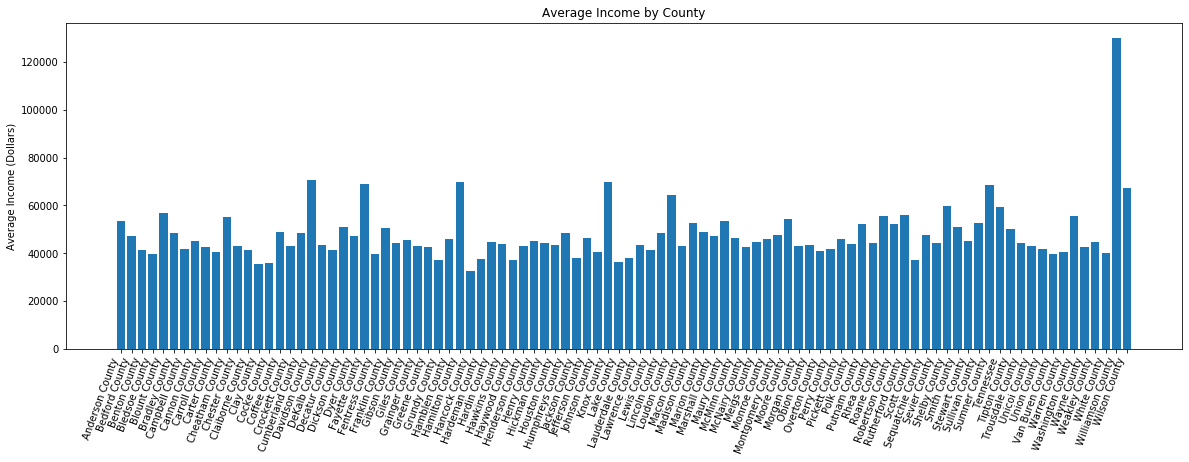

In [179]:
plt.figure(figsize = (20, 6))
plt.bar('county', 'avg_income', data = income_count_agg)
plt.xlabel('')
plt.xticks(rotation = 70, ha='right')
plt.ylabel('Average Income (Dollars)')
plt.title('Average Income by County')

Text(0.5, 1.0, 'Average Income by County')

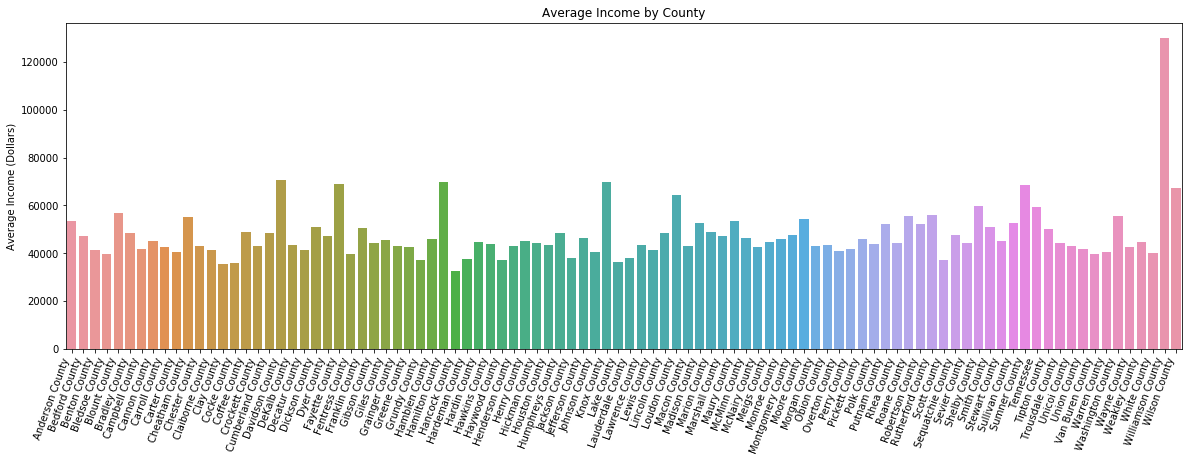

In [180]:
plt.figure(figsize = (20, 6))
sns.barplot('county', 'avg_income', data = income_count_agg)
plt.xlabel('')
plt.xticks(rotation = 70, ha='right')
plt.ylabel('Average Income (Dollars)')
plt.title('Average Income by County')

In [181]:
cancer_costs_df.head(2)

,year,geography,measure,adjustment,analysis,domain,condition,primary_sex,primary_age,primary_dual,fips,county,state,urban,primary_race,primary_denominator,analysis_value
2396,2017,County,Average total cost,Unsmoothed actual,Base measure,Primary chronic conditions,"Cancer, Colorectal, Breast, Prostate, Lung",All,All,Dual & non-dual,47001,Anderson County,TENNESSEE,Urban,All,undefined,15454
2397,2017,County,Average total cost,Unsmoothed actual,Base measure,Primary chronic conditions,"Cancer, Colorectal, Breast, Prostate, Lung",All,All,Dual & non-dual,47003,Bedford County,TENNESSEE,Rural,All,undefined,19219


In [182]:
ha_costs_df.head(2)

,year,geography,measure,adjustment,analysis,domain,condition,primary_sex,primary_age,primary_dual,fips,county,state,urban,primary_race,primary_denominator,analysis_value
2030,2017,County,Average total cost,Unsmoothed actual,Base measure,Primary chronic conditions,Acute myocardial infarction,All,All,Dual & non-dual,47001,Anderson County,TENNESSEE,Urban,All,undefined,42749
2031,2017,County,Average total cost,Unsmoothed actual,Base measure,Primary chronic conditions,Acute myocardial infarction,All,All,Dual & non-dual,47003,Bedford County,TENNESSEE,Rural,All,undefined,43661


Text(0.5, 1.0, 'Total Cost by County')

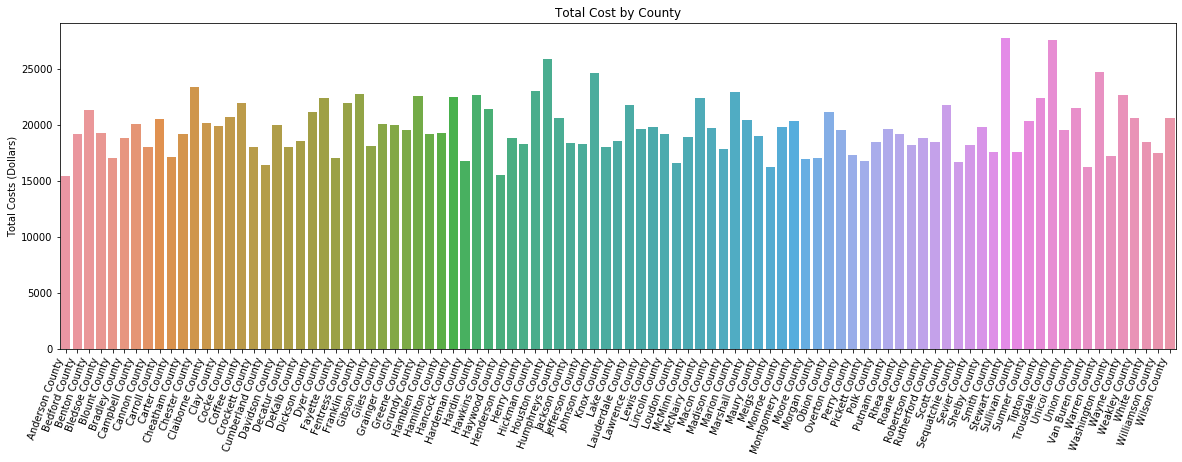

In [183]:
plt.figure(figsize = (20, 6))
sns.barplot('county', 'analysis_value', data = cancer_costs_df)
plt.xlabel('')
plt.xticks(rotation = 70, ha='right')
plt.ylabel('Total Costs (Dollars)')
plt.title('Total Cost by County')

Text(0.5, 1.0, 'Total Cost by County')

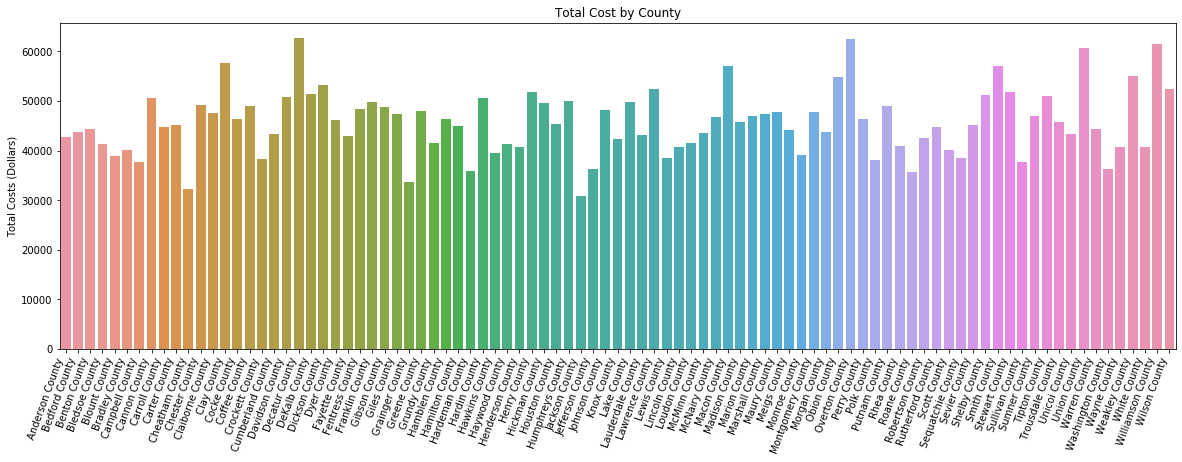

In [184]:
plt.figure(figsize = (20, 6))
sns.barplot('county', 'analysis_value', data = ha_costs_df)
plt.xlabel('')
plt.xticks(rotation = 70, ha='right')
plt.ylabel('Total Costs (Dollars)')
plt.title('Total Cost by County')

In [185]:
tn_ha_costs_df = ha_costs_df[['county','urban','analysis_value']]

In [186]:
tn_ha_costs_df.head(2)

,county,urban,analysis_value
2030,Anderson County,Urban,42749
2031,Bedford County,Rural,43661


In [187]:
tn_ha_costs = pd.merge(tn_ha_costs_df, income_count_agg[['county','avg_income']], on="county", how = 'right')

In [188]:
tn_ha_costs.head()

,county,urban,analysis_value,avg_income
0,Anderson County,Urban,42749.0,53382
1,Bedford County,Rural,43661.0,47128
2,Benton County,Rural,44423.0,41297
3,Bledsoe County,Rural,41240.0,39744
4,Blount County,Urban,38968.0,56786


In [189]:
tn_ha_costs.isnull().sum()

county            0
urban             5
analysis_value    5
avg_income        0
dtype: int64

In [190]:
tn_ha_costs['cost_income_ratio'] = tn_ha_costs.analysis_value/tn_ha_costs.avg_income

In [191]:
tn_ha_costs.head()

,county,urban,analysis_value,avg_income,cost_income_ratio
0,Anderson County,Urban,42749.0,53382,0.800813
1,Bedford County,Rural,43661.0,47128,0.926434
2,Benton County,Rural,44423.0,41297,1.075696
3,Bledsoe County,Rural,41240.0,39744,1.037641
4,Blount County,Urban,38968.0,56786,0.686225


In [192]:
tn_ha_costs.shape

(96, 5)

In [193]:
tn_ha_costs.isnull().sum()

county               0
urban                5
analysis_value       5
avg_income           0
cost_income_ratio    5
dtype: int64

In [194]:
tn_ha_costs.cost_income_ratio.describe()

count    91.000000
mean      0.990191
std       0.215559
min       0.474235
25%       0.853859
50%       1.006337
75%       1.122572
max       1.628980
Name: cost_income_ratio, dtype: float64

In [195]:
tn_cancer_costs = cancer_costs_df[['county','urban', 'analysis_value']]

In [197]:
tn_cancer_costs = pd.merge(tn_cancer_costs, income_count_agg[['county','avg_income']], on="county", how = 'right')

In [198]:
tn_cancer_costs.head()

,county,urban,analysis_value,avg_income
0,Anderson County,Urban,15454.0,53382
1,Bedford County,Rural,19219.0,47128
2,Benton County,Rural,21315.0,41297
3,Bledsoe County,Rural,19250.0,39744
4,Blount County,Urban,17073.0,56786


In [199]:
tn_cancer_costs['cost_income_ratio'] = tn_cancer_costs.analysis_value/tn_cancer_costs.avg_income

In [200]:
tn_cancer_costs.isnull().sum()

county               0
urban                1
analysis_value       1
avg_income           0
cost_income_ratio    1
dtype: int64

In [201]:
tn_cancer_costs.cost_income_ratio.describe()

count    95.000000
mean      0.432218
std       0.097560
min       0.135063
25%       0.364157
50%       0.430877
75%       0.483406
max       0.691217
Name: cost_income_ratio, dtype: float64

In [202]:
?pd.rename

Object `pd.rename` not found.


In [210]:
tn_cancer_costs = tn_cancer_costs.rename(columns ={"county":"county","urban":"urban","analysis_value":"cancer_analysis_value", "cancer_avg_income":"avg_income","cost_income_ratio":"cancer_cost_income_ratio"})

In [205]:
tn_ha_costs.head()

,county,urban,analysis_value,avg_income,cost_income_ratio
0,Anderson County,Urban,42749.0,53382,0.800813
1,Bedford County,Rural,43661.0,47128,0.926434
2,Benton County,Rural,44423.0,41297,1.075696
3,Bledsoe County,Rural,41240.0,39744,1.037641
4,Blount County,Urban,38968.0,56786,0.686225


In [211]:
tn_ha_costs = tn_ha_costs.rename(columns = {"analysis_value":"ha_analysis_value", "cost_income_ratio":"ha_cost_income_ratio"})

In [212]:
ha_cancer_costs = pd.merge(tn_cancer_costs, tn_ha_costs, on = ['county','urban','avg_income'], how = "left")

In [213]:
ha_cancer_costs.head(5)

,county,urban,cancer_analysis_value,avg_income,cancer_cost_income_ratio,ha_analysis_value,ha_cost_income_ratio
0,Anderson County,Urban,15454.0,53382,0.289498,42749.0,0.800813
1,Bedford County,Rural,19219.0,47128,0.407804,43661.0,0.926434
2,Benton County,Rural,21315.0,41297,0.516139,44423.0,1.075696
3,Bledsoe County,Rural,19250.0,39744,0.484350,41240.0,1.037641
4,Blount County,Urban,17073.0,56786,0.300655,38968.0,0.686225


In [214]:
ha_cancer_costs.tail(5)

,county,urban,cancer_analysis_value,avg_income,cancer_cost_income_ratio,ha_analysis_value,ha_cost_income_ratio
91,Weakley County,Rural,20655.0,44527,0.463876,55139.0,1.238327
92,White County,Rural,18515.0,40297,0.459463,40717.0,1.010423
93,Williamson County,Urban,17527.0,129769,0.135063,61541.0,0.474235
94,Wilson County,Urban,20618.0,67411,0.305855,52387.0,0.777128
95,Tennessee,NaN,NaN,59264,NaN,NaN,NaN


In [215]:
ha_cancer_costs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 96 entries, 0 to 95
Data columns (total 7 columns):
county                      96 non-null object
urban                       95 non-null object
cancer_analysis_value       95 non-null float64
avg_income                  96 non-null int64
cancer_cost_income_ratio    95 non-null float64
ha_analysis_value           91 non-null float64
ha_cost_income_ratio        91 non-null float64
dtypes: float64(4), int64(1), object(2)
memory usage: 6.0+ KB


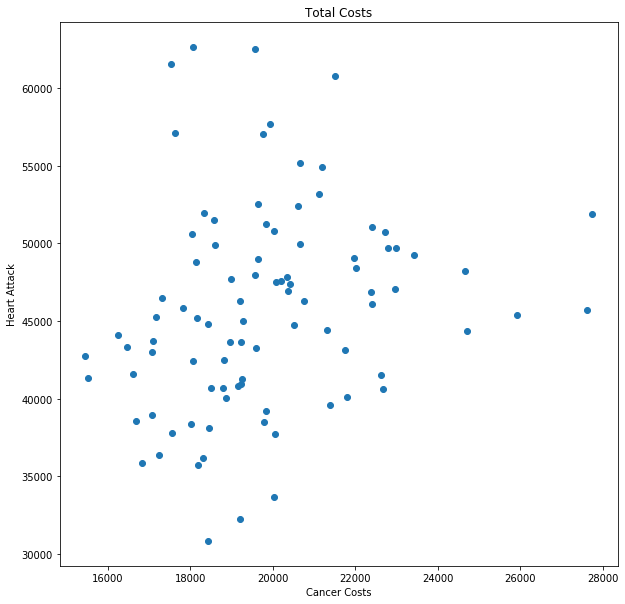

In [220]:
fig, ax = plt.subplots(figsize=(10,10))
ax.scatter(ha_cancer_costs.cancer_analysis_value, ha_cancer_costs.ha_analysis_value)
ax.set_xlabel("Cancer Costs")
ax.set_ylabel("Heart Attack")
ax.set_title("Total Costs");